### INF121 code Anja

# Introduction

Since the purpose of this data inspection is to extract information about boston and its offence-patterns and information, the following part is done to get a general overview of the data. 
The plots presented are extracted to gain information about the dataset in addition to getting better understanding of Boston offences. Therefore the plots and graphs will be further commented under each section, in the light of what useful knowlegde there is to be found here.

#### The following plots are used to find answers to the following questions
##### Data related:

##### Content related:


* What crime is the most common?
* Which areas has the most crime incidents?
* Are the different crimes more thypical in specific areas?
* Does the number of crimes depend on time or day?
* Are there some specific patterns or correlations worth showing?

#### The plots and graphs
* Hourly distribution of crimes through a day
* Distribution of crimes through a week
* Month wise crime distribution
* Top ten crime types
* Year wise # of crimes
* A visual map of Boston with a descriptive layer of crime-info
* Streets with most crime-incidents

The preprocessing of the data will be further described in the section of Data Handling. (see 2. Handle data and remove non-valid inputs).


### Discussion
What could have been done differently?
Does the data represent the reality well?
How did we handle non-valid values?
What can be done further?


## 1. Import 

In [1]:

#==============================================================================
# Import modules
#==============================================================================
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import pandas as pd
import seaborn as sns


## 2. Handle data and remove non-valid inputs

In [3]:

#==============================================================================
# Prepro. data
#==============================================================================

#import dataset into pandas dataframe, handle encoding problem
data = pd.read_csv("crime.csv", encoding = "ISO-8859-1", low_memory=False)


colnames=data.columns
nullvalues=data.isnull().sum()

print(data['STREET'].unique())

#Highest number of incidents for a particular crime occured in each year
topnum=data.groupby(['OFFENSE_CODE_GROUP','YEAR']).size().reset_index(name='count').sort_values(by=['count'], ascending=False)



['ARLINGTON ST' 'ALLSTON ST' 'DEVON ST' ... 'NEWCOMB' 'MT PLEASANT AVE'
 'SAVIN HILL AV']


## 3. Visualisation

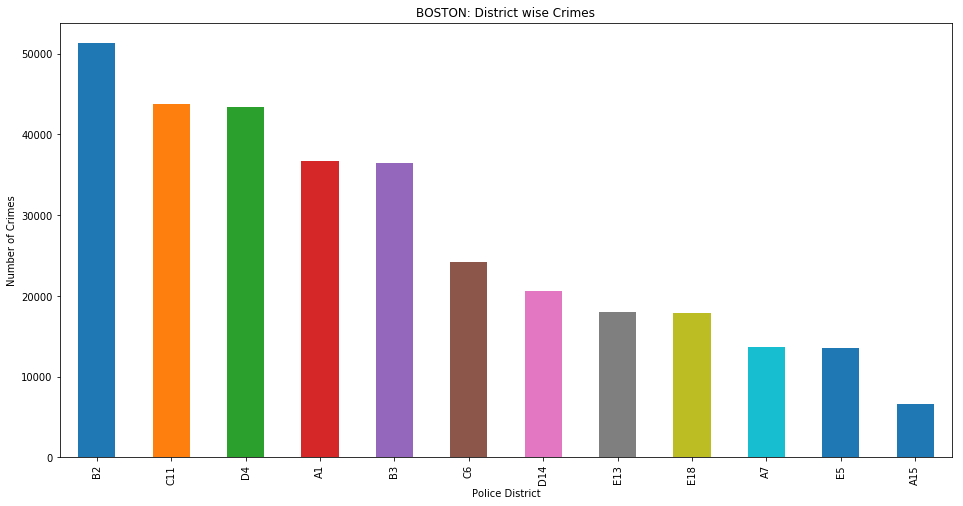

In [4]:

#==============================================================================
# Data Visualization
#==============================================================================

# District wise crimes
plt.figure(figsize=(16,8))
data['DISTRICT'].value_counts().plot.bar()
plt.title('BOSTON: District wise Crimes')
plt.ylabel('Number of Crimes')
plt.xlabel('Police District')
plt.show()
# Maxium number of Crimes observed in Police District B2 in Boston.


Comment of plot:

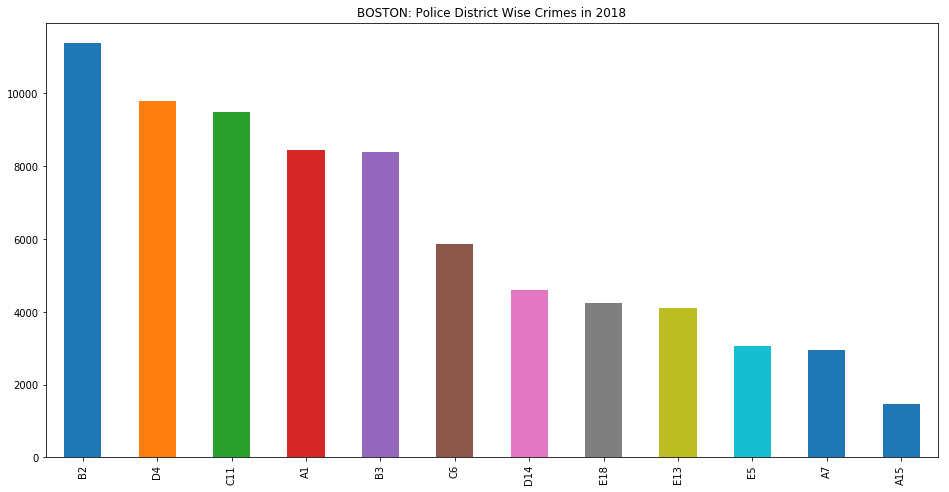

In [5]:

# District wise crimes For individual years: 2018 OBS
plt.figure(figsize=(16,8))
data['DISTRICT'].loc[data['YEAR']==2018].value_counts().plot.bar()
plt.title('BOSTON: Police District Wise Crimes in 2018')
plt.show()
# Maxium number of Crimes observed in Police District B2 in Boston.



Comment:

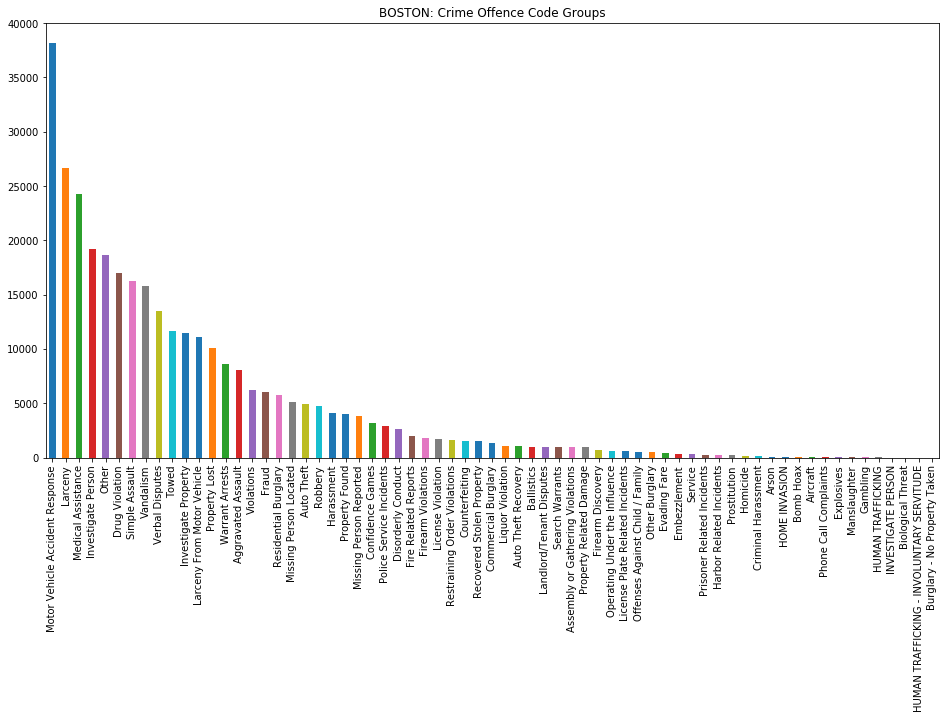

In [6]:
#  Offence Code Group (All offences)
plt.figure(figsize=(16,8))
data['OFFENSE_CODE_GROUP'].value_counts().plot.bar()
plt.title('BOSTON: Crime Offence Code Groups')
plt.show()
# Motor Vehicle Accident Response tops in the list.


Comment:


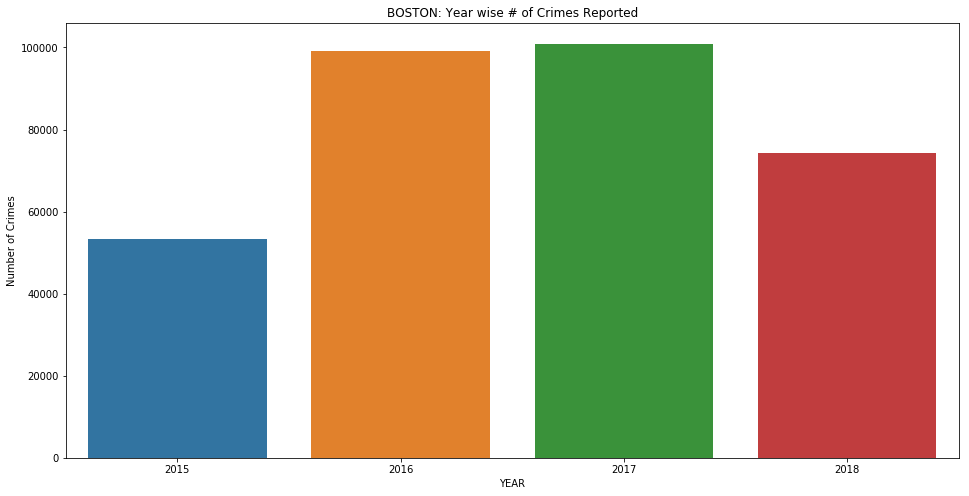

In [7]:

# Number of Crimes reported in Boston Each Year
plt.figure(figsize=(16,8))
sns.countplot(x='YEAR', data = data)
plt.ylabel('Number of Crimes')
plt.title('BOSTON: Year wise # of Crimes Reported')
plt.show()
# Maxium number of Crimes is observed in 2017



Comment:


### Top ten:

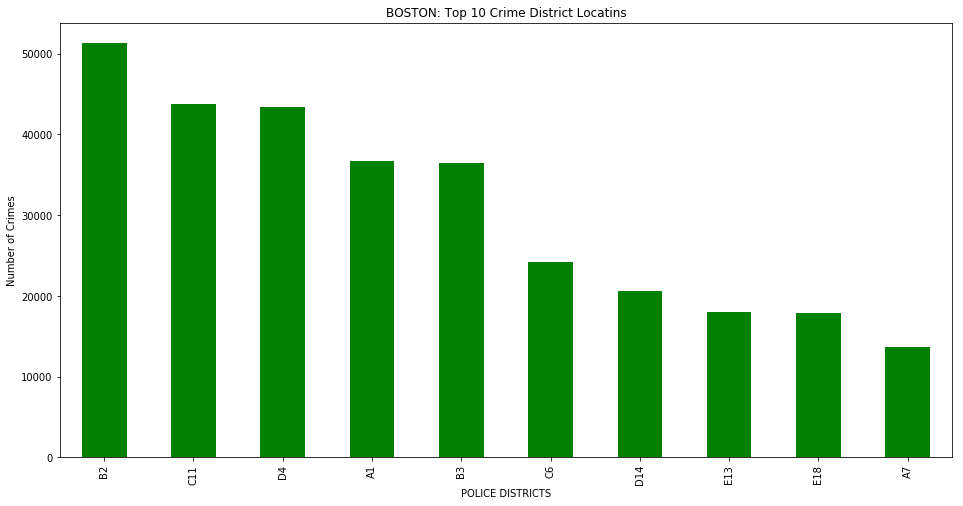

In [8]:
# Top 10 Crime District Locations
plt.figure(figsize=(16,8))
top10cloc = data.groupby('DISTRICT')['INCIDENT_NUMBER'].count().sort_values(ascending=False)
top10cloc = top10cloc [:10]
top10cloc.plot(kind='bar', color='green')
plt.ylabel('Number of Crimes')
plt.xlabel("POLICE DISTRICTS")
plt.title('BOSTON: Top 10 Crime District Locatins')
plt.show()
# Maxium number of Crimes observed in Police District B2 in Boston.



Comment:

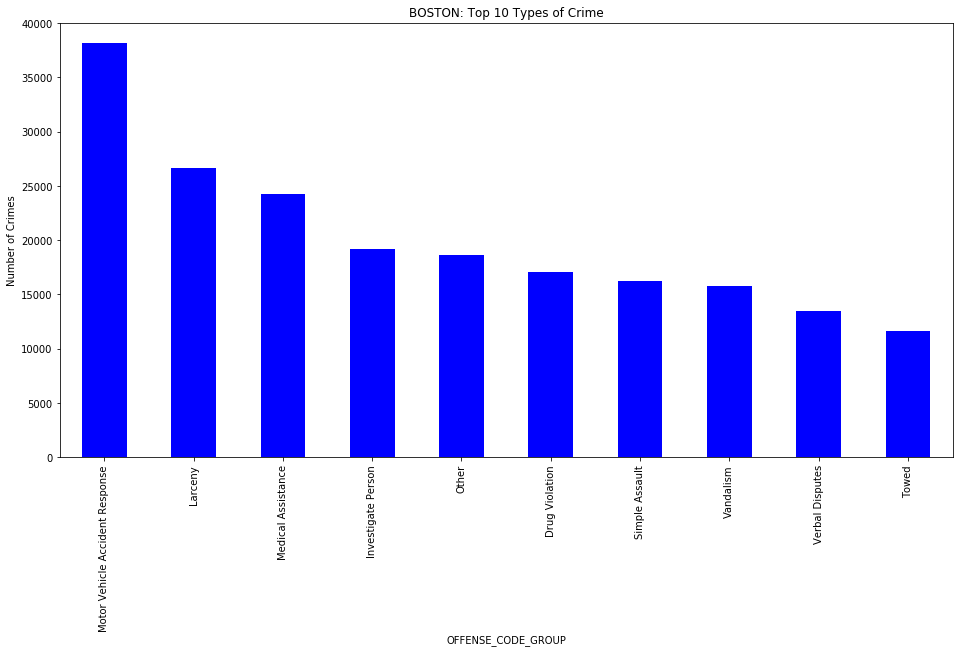

In [9]:


# Top 10 Types of Crime
plt.figure(figsize=(16,8))
top10ctype = data.groupby('OFFENSE_CODE_GROUP')['INCIDENT_NUMBER'].count().sort_values(ascending=False)
top10ctype = top10ctype [:10]
top10ctype.plot(kind='bar', color='blue')
plt.ylabel('Number of Crimes')
plt.title('BOSTON: Top 10 Types of Crime')
plt.show()
# Motor Vehicle Accident Response tops in the list.



Comment:

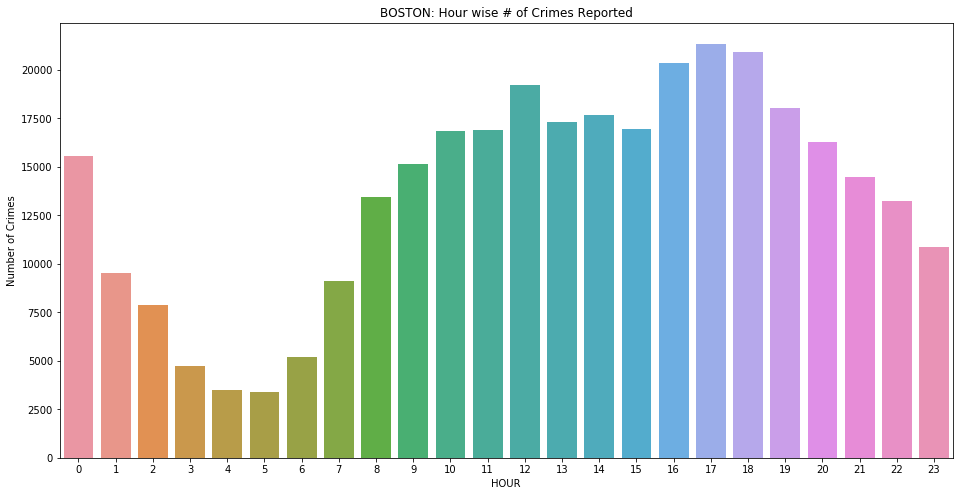

In [10]:

# When do serious crimes occur?
#We can consider patterns across several different time scales: hours of the day, days of the week, and months of the year.

# Number of Crimes reported at Hour during the Day
plt.figure(figsize=(16,8))
sns.countplot(x='HOUR', data = data)
plt.ylabel('Number of Crimes')
plt.title('BOSTON: Hour wise # of Crimes Reported')
#plt.savefig("C:\\Users\\bk42969\\Desktop\\BigData\\CrimeHourDuringTheDay.png")
plt.show()
# Crimes are observed Least in the Early Hours of the Morning. 



Comment:

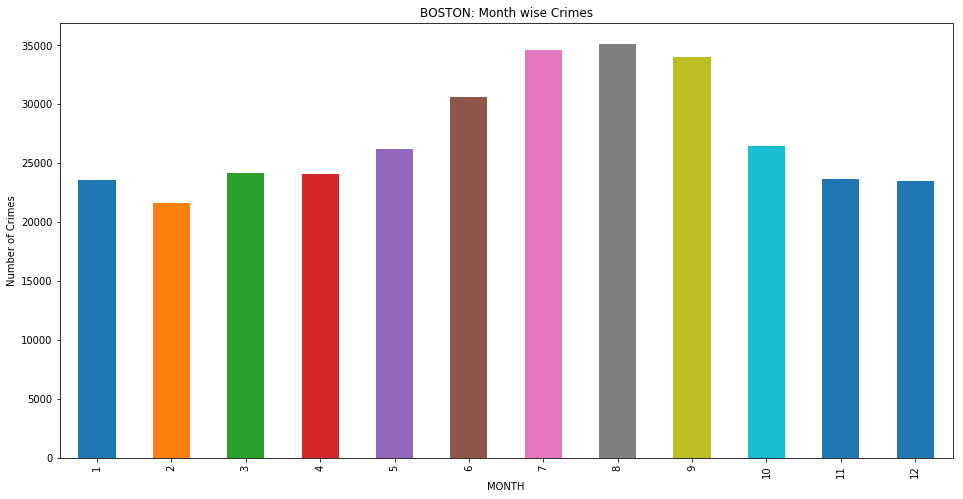

In [11]:

# Comparing crimes during months.
plt.figure(figsize=(16,8))
data.groupby(['MONTH'])['INCIDENT_NUMBER'].count().plot(kind = 'bar')
plt.ylabel('Number of Crimes')
plt.title('BOSTON: Month wise Crimes')
#plt.savefig("C:\\Users\\bk42969\\Desktop\\BigData\\CrimeDuringTheMonth.png")
plt.show()
# Maximum number of Crimes observed in July, Aug & Sep Months.



Comment:

Text(0.5,1,'BOSTON: Top 10 locations of Crime')

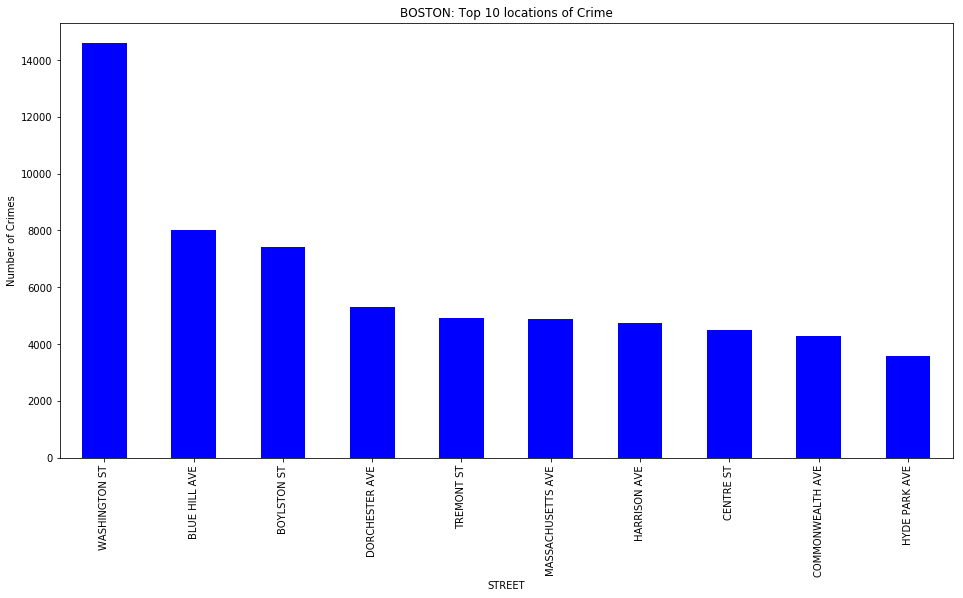

In [12]:

# Top 10 locations of Crime (streetwise)
plt.figure(figsize=(16,8))
top10loc = data.groupby('STREET')['INCIDENT_NUMBER'].count().sort_values(ascending=False)
top10loc = top10loc [:10]
top10loc.plot(kind='bar', color='blue')
plt.ylabel('Number of Crimes')
plt.title('BOSTON: Top 10 locations of Crime')

Comment: